In [1]:
# This notebook is used to read in extracted fields to make
# Figure 9
# Reichl et al., 2024 (submitted to AGU's ESS journal)

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
from glob import glob
import sys
import gsw as gsw
import copy as copy
import matplotlib as mpl
def modtime(H):
    try:
        datetimeindex = H.indexes['Time'].to_datetimeindex()
        H['Time']=datetimeindex
    except:
        datetimeindex = H.indexes['time'].to_datetimeindex()
        H['time']=datetimeindex
        
    return H

In [2]:
#This should point to where LES and SCM data are located.
data_loc = '/net/bgr/Work/Tropics_Paper/Paper/Data'
LES0 = xr.open_dataset(data_loc+'/ROMS_PSH_6HRLIN_0N140W_360x360x216_22OCT2020.nc').isel(z=slice(0,215))
LES3 = xr.open_dataset(data_loc+'/ROMS_PSH_6HRLIN_3N140W_360x360x216_22OCT2020.nc').isel(z=slice(0,215))

LES0_1h = LES0.resample(time='1H').interpolate(kind="linear")
LES3_1h = LES3.resample(time='1H').interpolate(kind="linear")

rho0=LES0.rho0.values
alpha = LES0.alpha.values
beta = LES0.beta.values


/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to 

In [3]:
mom_data_loc = '../Data/'
MOM0 = modtime(xr.open_dataset(mom_data_loc+'/19851002.ocean_hourly_ePBL_RH18_0.nc').isel(xh=0,yh=0,xq=0,yq=0).squeeze())
MOM3 = modtime(xr.open_dataset(mom_data_loc+'/19851002.ocean_hourly_ePBL_RH18_3.nc').isel(xh=0,yh=0,xq=0,yq=0).squeeze())

MOM0_1 = modtime(xr.open_dataset(mom_data_loc+'/19851002.ocean_hourly_ePBL_cap_0.nc').isel(xh=0,yh=0,xq=0,yq=0).squeeze())
MOM3_1 = modtime(xr.open_dataset(mom_data_loc+'/19851002.ocean_hourly_ePBL_cap_3.nc').isel(xh=0,yh=0,xq=0,yq=0).squeeze())

MOM0_2 = modtime(xr.open_dataset(mom_data_loc+'/19851002.ocean_hourly_GLS_0.nc').isel(xh=0,yh=0,xq=0,yq=0).squeeze())
MOM3_2 = modtime(xr.open_dataset(mom_data_loc+'/19851002.ocean_hourly_GLS_3.nc').isel(xh=0,yh=0,xq=0,yq=0).squeeze())




/tmp/ipykernel_105780/877119525.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = H.indexes['time'].to_datetimeindex()
/tmp/ipykernel_105780/877119525.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = H.indexes['time'].to_datetimeindex()
/tmp/ipykernel_105780/877119525.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dat

In [9]:

def group_detrended_hour2(data1h):
    #Deals with the fact that the dataset might not
    # be divisible by 24 hours, in which case the
    # composites are sensitive to averaging over the
    # samples while forcing changes over the dataset.
    #We simply cut the last indices out that do not give a full day.
    LT = np.shape(data1h)[0]
    LZ = np.shape(data1h)[1]
    
    FLD=np.zeros([24,LZ])
    FLDdt=np.zeros([24,LZ])

    for ii in range(24):
        UP = (LT//24)*24
        HRs = data1h[ii:UP:24,:]
        FLD[ii,:]=np.mean(HRs,axis=0)
        
    return FLD

def group_detrended_hour2b(data1h):
    #Deals with the fact that the dataset might not
    # be divisible by 24 hours, in which case the
    # composites are sensitive to averaging over the
    # samples while forcing changes over the dataset.
    #We simply cut the last indices out that do not give a full day.
    LT = np.shape(data1h)[0]
    LZ = np.shape(data1h)[1]
    
    FLD=np.zeros([24,LZ])
    FLDdt=np.zeros([24,LZ])

    for ii in range(24):
        UP = (LT//24)*24
        HRs = data1h[ii:UP:24,:]
        FLD[ii,:]=np.mean(HRs,axis=0)

    #Removes the trend
    for ii in range(LZ):
        FLDdt[:,ii]=FLD[:,ii]-np.arange(0.5,24)*(FLD[-1,ii]-FLD[0,ii])/24
        
    return FLDdt
        

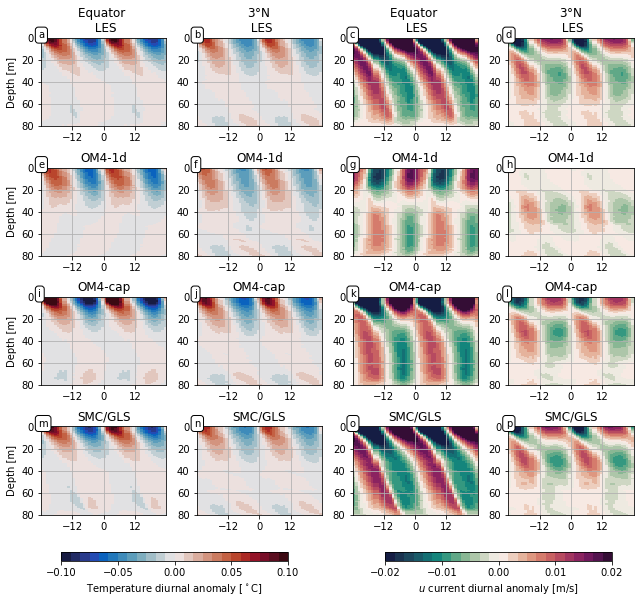

In [10]:
cmap1=cmocean.cm.balance
levels1=np.linspace(-1e-4,1e-4,25)
levels1=np.linspace(-0.1,0.1,25)

cmap2=cmocean.cm.curl
levels2=np.linspace(-1e-5,1e-5,25)
levels2=np.linspace(-.02,.02,25)

f,a=plt.subplots(4,4,figsize=(9,8))

UP = (LES0_1h.time.size//24)*24
LES=LES0_1h.isel(time=slice(0,UP))
LES_DAT=(LES.tempme).values.astype(np.float64)
FLDdt = group_detrended_hour2b(LES_DAT)
FLDdt = FLDdt-np.mean(FLDdt,axis=0)

time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)

fld=(FLDdt[xi,:]).T

ax=a.ravel()[0]
C1=ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
                -LES0_1h.z,
                np.concatenate((fld,fld,fld),axis=1),
                cmap=cmap1,
                norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
               )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('Equator \n LES')
ax.set_ylabel('Depth [m]')

UP = (LES3_1h.time.size//24)*24
LES=LES3_1h.isel(time=slice(0,UP))
LES_DAT=(LES.tempme).values.astype(np.float64)
FLDdt = group_detrended_hour2b(LES_DAT)
FLDdt = FLDdt-np.mean(FLDdt,axis=0)

time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)

fld=(FLDdt[xi,:]).T

ax=a.ravel()[1]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
                -LES3_1h.z,
                np.concatenate((fld,fld,fld),axis=1),
                cmap=cmap1,
                norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
               )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('3$\degree$N \n LES')


UP = (LES0_1h.time.size//24)*24
LES=LES0_1h.isel(time=slice(0,UP))
LES_DAT=(LES.ume).values.astype(np.float64)
FLDdt = group_detrended_hour2b(LES_DAT)
FLDdt = FLDdt-np.mean(FLDdt,axis=0)

time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)

fld=(FLDdt[xi,:]).T

ax=a.ravel()[2]
C2=ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
                -LES0_1h.z,
                np.concatenate((fld,fld,fld),axis=1),
                cmap=cmap2,
                norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
               )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('Equator \n LES')


UP = (LES3_1h.time.size//24)*24
LES=LES3_1h.isel(time=slice(0,UP))
LES_DAT=(LES.ume).values.astype(np.float64)
FLDdt = group_detrended_hour2b(LES_DAT)
FLDdt = FLDdt-np.mean(FLDdt,axis=0)

time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)

fld=(FLDdt[xi,:]).T

ax=a.ravel()[3]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
                -LES3_1h.z,
                np.concatenate((fld,fld,fld),axis=1),
                cmap=cmap2,
                norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
               )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('3$\degree$N \n LES')


FLDdt = group_detrended_hour2b((MOM0.thetao).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[4]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM0.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap1,
               norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-1d')
ax.set_ylabel('Depth [m]')

FLDdt = group_detrended_hour2b((MOM3.thetao).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[5]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM3.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap1,
               norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-1d')

FLDdt = group_detrended_hour2b((MOM0.uo).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[6]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM0.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap2,
               norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-1d')

FLDdt = group_detrended_hour2b((MOM3.uo).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[7]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM3.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap2,
               norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-1d')

FLDdt = group_detrended_hour2b((MOM0_1.thetao).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[8]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM0.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap1,
               norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-cap')
ax.set_ylabel('Depth [m]')

FLDdt = group_detrended_hour2b((MOM3_1.thetao).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[9]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM3.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap1,
               norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-cap')

FLDdt = group_detrended_hour2b((MOM0_1.uo).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[10]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM0.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap2,
               norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-cap')

FLDdt = group_detrended_hour2b((MOM3_1.uo).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[11]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM3.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap2,
               norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('OM4-cap')

FLDdt = group_detrended_hour2b((MOM0_2.thetao).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[12]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM0.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap1,
               norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('SMC/GLS')
ax.set_ylabel('Depth [m]')

FLDdt = group_detrended_hour2b((MOM3_2.thetao).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[13]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM3.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap1,
               norm = mpl.colors.BoundaryNorm(levels1, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('SMC/GLS')

FLDdt = group_detrended_hour2b((MOM0_2.uo).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[14]
ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM0.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap2,
               norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('SMC/GLS')

FLDdt = group_detrended_hour2b((MOM3_2.uo).values.astype(np.float64))
FLDdt = FLDdt-np.mean(FLDdt,axis=0)
time=np.arange(24)+9.5
time[time>12]-=24
xi=np.argsort(time)
fld=(FLDdt[xi,:]).T
ax=a.ravel()[15]
C2=ax.pcolormesh(np.concatenate((time[xi]-24.,time[xi],time[xi]+24)),
               MOM3.zl,
               np.concatenate((fld,fld,fld),axis=1),
               cmap=cmap2,
               norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap1.N, clip=False)
              )
ax.set_xlim(-24,24)
ax.set_ylim(80,0)
ax.set_xticks([-12,0,12])
ax.grid(True)
ax.set_title('SMC/GLS')

f.tight_layout()

f.subplots_adjust(bottom=0.1)



cbar_ax = f.add_axes([0.1, 0.02, 0.35, 0.015])
cb=f.colorbar(C1, cax=cbar_ax,orientation='horizontal')
#lbls = ["{:1.1e}".format(i) for i in cb.get_ticks()]
cb.set_label(r'Temperature diurnal anomaly [$^\circ$C]')
#cb.ax.set(yticks=cb.get_ticks(),yticklabels=lbls)
cb.ax.set_xticks(ticks=[-0.1,-0.05,0,0.05,0.1])

cbar_ax = f.add_axes([0.6, 0.02, 0.35, 0.015])
cb=f.colorbar(C2, cax=cbar_ax,orientation='horizontal')
cb.set_label(r'$u$ current diurnal anomaly [m/s]')
#lbls = ["{:1.1e}".format(i) for i in cb.get_ticks()]
#cb.ax.set(xticks=cb.get_ticks(),xticklabels=lbls)
cb.ax.set_xticks(ticks=[-0.02,-0.01,0,0.01,0.02])

for AXi in range(16):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    a.ravel()[AXi].text(-25,0,txt,bbox=dict(boxstyle='round', facecolor='white'))
    
f.savefig('../Fig/LES-MOM1d-T-U_diurnalcomposite.png',dpi=200,bbox_inches = "tight")